# Project Description

Zuber, a new ride-sharing company that's launching in Chicago. 
Main objective of research is to understand passenger preferences and the impact of external
factors on rides.

## Table of contents:
- [**1. General information about data**](#first-step)
- [**2. The top 10 neighborhoods in terms of drop-offs**](#second-step)
- [**3. Graphs for taxi companies and number of rides**](#third-step)
- [**4. Testing of hypotheses**](#forth-step)
- [**5. General conclusion**](#fifth-step)

## 1. General information about data <a class="anchor" id="first-step"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
#reading file with data
company = pd.read_csv('project_sql_result_01.csv')
print(company)

                       company_name  trips_amount
0                         Flash Cab         19558
1         Taxi Affiliation Services         11422
2                 Medallion Leasing         10367
3                        Yellow Cab          9888
4   Taxi Affiliation Service Yellow          9299
..                              ...           ...
59     4053 - 40193 Adwar H. Nikola             7
60          2733 - 74600 Benny Jona             7
61    5874 - 73628 Sergey Cab Corp.             5
62       2241 - 44667 - Felman Corp             3
63      3556 - 36214 RC Andrews Cab             2

[64 rows x 2 columns]


In [3]:
#studing general info
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
#describing data
company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


**Conclusion**

We have data which consist of 64 rows and 2 columns. There are no missing values and data types does not request to change. Data contains information about companies which provides taxi services and amount of trips for each company. There are 64 companies. Maximum number of trips is 19558, minimum is 2. Average amount of trips is 2145. Median value is 179. The mean is significantly greater than the median. The data has positive skew.

In [5]:
#reading file with data
neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')
print(neighborhoods)

   dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
..                   ...            ...
89       Mount Greenwood       3.137931
90             Hegewisch       3.117647
91              Burnside       2.333333
92             East Side       1.961538
93             Riverdale       1.800000

[94 rows x 2 columns]


In [6]:
#studing general info
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


**Conclusion**

We have data which consist of 94 rows and 2 columns. There are no missing values and data types does not request to change. Data contains information about dropoff location and duration of average trips. There are 94 neighborhoods. 

## 2. The top 10 neighborhoods in terms of drop-offs <a class="anchor" id="second-step"></a>

In [7]:
#finding top10 neiborhoods
neighborhoods.sort_values('average_trips',ascending=False).head(10).round(2)

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90
5,Lake View,2420.97
6,Grant Park,2068.53
7,Museum Campus,1510.00
8,Gold Coast,1364.23
9,Sheffield & DePaul,1259.77


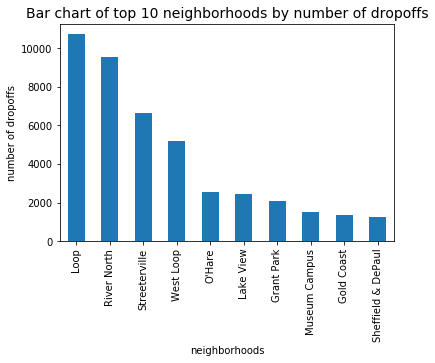

In [8]:
#ploting bar chart of top 10 neiborhoods
neighborhoods.groupby('dropoff_location_name')['average_trips'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Bar chart of top 10 neighborhoods by number of dropoffs', fontsize=14)
plt.ylabel('number of dropoffs')
plt.xlabel('neighborhoods')
plt.show()


**CONCLUSION**

We have selected the top 10 locations by number of drop offs. The largest number of drop offs is in the Loop neighborhood - 10 727 trips where Loop was the location of drop offs. The second most popular area is River North - 9524 trips. From the top 10 locations, 4 leading places can be distinguished: Loop, River North, Streeterville, West Loop, in other areas drop-offs occurs at least twice less often.

## 3. Graphs for taxi companies and number of rides <a class="anchor" id="third-step"></a>

In [9]:
company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [10]:
company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


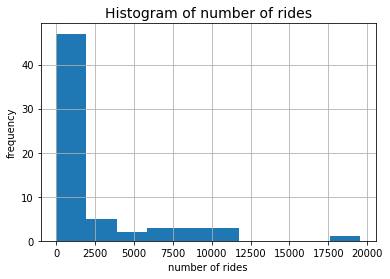

In [11]:
#ploting histogram
company.hist()
plt.title('Histogram of number of rides', fontsize=14)
plt.ylabel('frequency')
plt.xlabel('number of rides')
plt.show()

In [12]:
#finding companies with trips amount less than 2000
Company_less_than_2000 = company.groupby(['company_name']).filter(lambda x: x['trips_amount'] <= 2000).reset_index()
Company_less_than_2000

,index,company_name,trips_amount
0,17,Chicago Medallion Management,1955
1,18,24 Seven Taxi,1775
2,19,Chicago Medallion Leasing INC,1607
3,20,Checker Taxi,1486
4,21,American United,1404
5,22,Chicago Independents,1296
6,23,KOAM Taxi Association,1259
7,24,Chicago Taxicab,1014
8,25,Top Cab Affiliation,978
9,26,Gold Coast Taxi,428


In [13]:
#Counting number of companies with trips amount less than 2000
Company_less_than_2000['company_name'].count()

47

In [14]:
#finding total amount of trips for companies with trips amount less than 2000
Company_less_than_2000['trips_amount'].sum()

15590

In [15]:
#fnding companies with trips amount more than 2000
Company_more_than_2000_trips = company.groupby(['company_name']).filter(lambda x: x['trips_amount'] > 2000).reset_index()
Company_more_than_2000_trips

,index,company_name,trips_amount
0,0,Flash Cab,19558
1,1,Taxi Affiliation Services,11422
2,2,Medallion Leasing,10367
3,3,Yellow Cab,9888
4,4,Taxi Affiliation Service Yellow,9299
5,5,Chicago Carriage Cab Corp,9181
6,6,City Service,8448
7,7,Sun Taxi,7701
8,8,Star North Management LLC,7455
9,9,Blue Ribbon Taxi Association Inc.,5953


In [16]:
#adding to the data total amount of trips for of companies with trips amount less than 2000
company_new = Company_more_than_2000_trips.append({'company_name': 'Companies with trips amount less than 2000', 'trips_amount': 15590}, ignore_index=True)
company_new

,index,company_name,trips_amount
0,0.0,Flash Cab,19558
1,1.0,Taxi Affiliation Services,11422
2,2.0,Medallion Leasing,10367
3,3.0,Yellow Cab,9888
4,4.0,Taxi Affiliation Service Yellow,9299
5,5.0,Chicago Carriage Cab Corp,9181
6,6.0,City Service,8448
7,7.0,Sun Taxi,7701
8,8.0,Star North Management LLC,7455
9,9.0,Blue Ribbon Taxi Association Inc.,5953


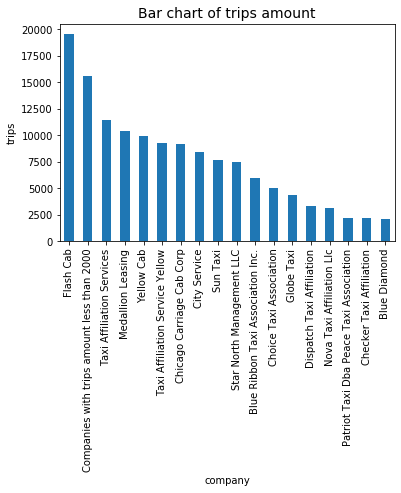

In [17]:
#Plotting histogram
company_new.groupby('company_name')['trips_amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Bar chart of trips amount', fontsize=14)
plt.ylabel('trips')
plt.xlabel('company')
plt.show()

In [18]:
#adding a new column with percentage
company_new['percent'] = company_new['trips_amount']*100/company_new['trips_amount'].sum()
company_new.round(2)

,index,company_name,trips_amount,percent
0,0.0,Flash Cab,19558,14.24
1,1.0,Taxi Affiliation Services,11422,8.32
2,2.0,Medallion Leasing,10367,7.55
3,3.0,Yellow Cab,9888,7.20
4,4.0,Taxi Affiliation Service Yellow,9299,6.77
5,5.0,Chicago Carriage Cab Corp,9181,6.69
6,6.0,City Service,8448,6.15
7,7.0,Sun Taxi,7701,5.61
8,8.0,Star North Management LLC,7455,5.43
9,9.0,Blue Ribbon Taxi Association Inc.,5953,4.34


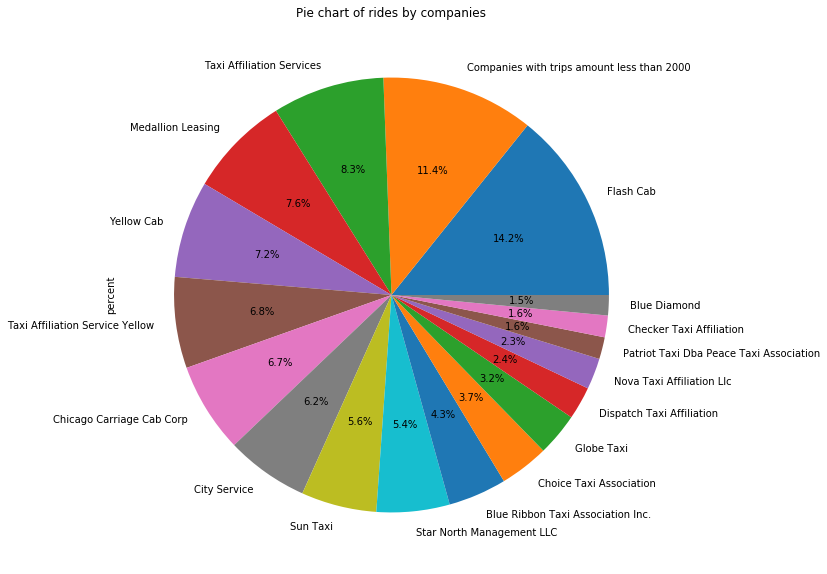

In [19]:
#ploting pie chart
company_new.groupby('company_name')['percent'].sum().sort_values(ascending=False).plot(kind='pie', subplots=True, 
figsize=(15,10), autopct='%1.1f%%')
plt.title('Pie chart of rides by companies')
plt.show()

**CONCLUSION**

We have data on 64 companies that provided taxi services for two days on November 15-16, 2017. The most popular company is Flash Cab, the number of trips by this company is 19558 (14,2%), which is almost twice the number of trips of the closest competitor - Taxi Affiliation Services (11422 trips). At the same time, the majority of companies (47) carried out less than 2000 trips, which was 11,35% of all traffic. To visualizate the data more clearly, we have combined these companies and displayed on a graph their total number of trips of 15590. 

## 4. Testing of hypotheses <a class="anchor" id="forth-step"></a>

In [20]:
#reading data
weather = pd.read_csv('/datasets/project_sql_result_07.csv')
print(weather)

                 start_ts weather_conditions  duration_seconds
0     2017-11-25 16:00:00               Good            2410.0
1     2017-11-25 14:00:00               Good            1920.0
2     2017-11-25 12:00:00               Good            1543.0
3     2017-11-04 10:00:00               Good            2512.0
4     2017-11-11 07:00:00               Good            1440.0
...                   ...                ...               ...
1063  2017-11-25 11:00:00               Good               0.0
1064  2017-11-11 10:00:00               Good            1318.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0
1067  2017-11-04 16:00:00                Bad            2834.0

[1068 rows x 3 columns]


In [21]:
#general info
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [22]:
#describing data
weather.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [23]:
#finding 0 values in column duration_seconds
print(weather.query('duration_seconds == 0.0'))

                 start_ts weather_conditions  duration_seconds
163   2017-11-11 09:00:00               Good               0.0
168   2017-11-11 07:00:00               Good               0.0
204   2017-11-18 19:00:00               Good               0.0
552   2017-11-04 01:00:00               Good               0.0
801   2017-11-04 09:00:00               Good               0.0
1063  2017-11-25 11:00:00               Good               0.0


In [24]:
#slicing the data
weather_new = weather.query('duration_seconds != 0.0')
weather_new

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."



Formulating hypotheses:

Null hypothesis H₀: Average duration of rides from the Loop to O'Hare International Airport on Saterdays in bad weather conditions equal average duration of rides from the Loop to O'Hare International Airport on Saterdays in good weather conditions.

Alternative hypothesis H₁: Average duration of rides from the Loop to O'Hare International Airport on Saterdays in bad weather conditions not equal average duration of rides from the Loop to O'Hare International Airport on Saterdays in good weather conditions.

alpha = 0,05

if pvalue is lower than alpha, we can reject null hypothesis. if pvalue is greater than alpha, we can not reject null hypothesis.

In [25]:
weather_new.groupby('weather_conditions')['duration_seconds'].describe()

,count,mean,std,min,25%,50%,75%,max
weather_conditions,,,,,,,,
Bad,180.0,2427.205556,721.314138,480.0,1962.00,2540.0,2928.0,4980.0
Good,882.0,2013.278912,743.565217,60.0,1397.25,1800.0,2460.0,7440.0


In [26]:
from scipy import stats as st
alpha = 0.05

results = st.ttest_ind(
        weather_new.loc[weather_new['weather_conditions']=='Bad', 'duration_seconds'].dropna(), 
        weather_new.loc[weather_new['weather_conditions']=='Good', 'duration_seconds'].dropna())

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  1.3318772977743245e-11
We reject the null hypothesis


There is a statistically significant differences in average duration of rides on rainy Saturdays and on Saturday with good weather condition.

## 5. General conclusion <a class="anchor" id="fifth-step"></a>

We have analyzed data matrix consisted of 64 rows and 2 columns with no missing values and data types not requested to change. 

In total 64 taxi services companies were studied with the information about drop-off location and duration of average trips 

We stated that the maximum number of trips was 19558 and the minimum 2. 
The average amount of trips was 2145. 

Having investigated 94 neighborhoods we have selected the top 10 locations by number of drop offs. From these top 10 locations, 4 leading places can be distinguished: Loop, River North, Streeterville, West Loop, in other areas drop-offs occurs at least twice less often.

Based on our analyzing we assume that the most popular company was Flash Cab, where the number of trips was over 14% (almost twice the number of trips of the closest competitor - Taxi Affiliation Services). 

At the same time, the majority of companies (47) carried out less than 2000 trips, which was 11,35% of all traffic. 

We could also notice that duration of rides on rainy days was statistically significant longer than on days with good weather condition.

Based on the above we would recommend making advertising for the most popular drop-off place’s population about our new concurring service with special offers for good weather days. 